# Predicting Corona Cases in New York

In this notebook, we will use data made available by [New York Times](https://github.com/nytimes/covid-19-data). We will use `piecewise linear regression` to predict number of covid cases in New York. Data collection for this example is an ongoing process. For our study, we have taken data from March 1, 2020 to June 16, 2020.

This notebook contains `Python` codes. The corona virus cases prediction figure of the paper has been produced in R, codes for which can be found [here](https://github.com/biswajitsahoo1111/machine_learning_regression_and_optimization/blob/master/Predicting_corona_cases_R.ipynb). In this notebook, we have used [pwlf](https://jekel.me/piecewise_linear_fit_py/index.html) package to obtain piecewise linear fit. Readers have to first install the package, if it is not already installed, to reproduce the results of this notebook.

In [1]:
import numpy as np
import pwlf
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
print("Numpy version: ", np.__version__)
print("pwlf version: ", pwlf.__version__)
print("Pandas version: ", pd.__version__)
print("Scikit-learn version: ", sklearn.__version__)
print("Matplotlib version: ", matplotlib.__version__)

Numpy version:  1.18.5
pwlf version:  2.0.3
Pandas version:  1.0.5
Scikit-learn version:  0.23.1
Matplotlib version:  3.2.2


In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
data.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [4]:
ny_data = data[data["state"] == "New York"]
x_data = np.arange(1, 107)
y_data = ny_data["cases"][:106]

## Train test split

We take data for first 90 days to fit the piecewise linear model. Then we use the model to predict number of cases for the next 16 days.

In [5]:
train_indices = np.arange(1, 91)
test_indices = np.arange(91, 107)
cases_train = y_data[:90]
cases_test = y_data[90:107]

## Fit linear regression model

In [6]:
reg_fit = LinearRegression()
reg_fit.fit(train_indices.reshape(-1,1), cases_train)

LinearRegression()

In [7]:
reg_fit_fitted_vals = reg_fit.predict(train_indices.reshape(-1,1))
reg_fit_prediction = reg_fit.predict(test_indices.reshape(-1,1))               # Prediction using linear regression

## Fit piecewise linear regression model

In [8]:
piecewise_fit = pwlf.PiecewiseLinFit(train_indices, cases_train)
res = piecewise_fit.fit(3)

In [9]:
piecewise_fitted = piecewise_fit.predict(train_indices)
piecewise_prediction = piecewise_fit.predict(test_indices)          # Prediction using piecewise linear model

## Plot results

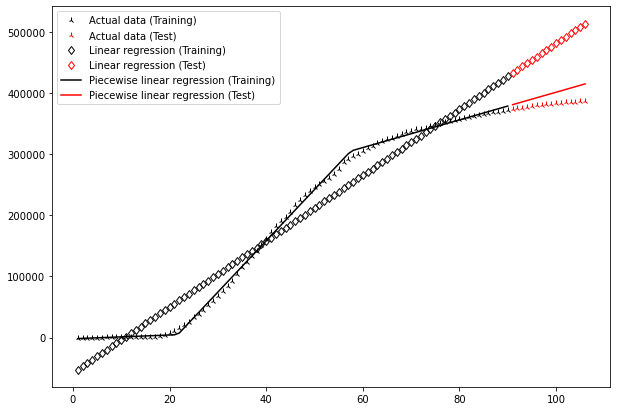

In [10]:
plt.figure(figsize = (10, 7))
plt.plot(train_indices, cases_train, marker = "2", linestyle = "None", color = "black", label = "Actual data (Training)")
plt.plot(test_indices, cases_test, marker = "2", linestyle = "None", color = "red", label = "Actual data (Test)")
plt.plot(train_indices, reg_fit_fitted_vals, linestyle = "None",  color = "black", marker = "d", fillstyle = "none",
         label = "Linear regression (Training)")
plt.plot(test_indices, reg_fit_prediction, linestyle = "None", color = "red", marker = "d", fillstyle = "none",
         label = "Linear regression (Test)")
plt.plot(train_indices, piecewise_fitted, color = "black", label = "Piecewise linear regression (Training)")
plt.plot(test_indices, piecewise_prediction, color = "red", label = "Piecewise linear regression (Test)")
plt.legend()
plt.show()

This example also shows some of the limitations of `simple linear regression`. From the above plot it can be seen that `linear regression` predicts number of cases to be negative at the initial stages of virus spread which is impractical.